Notes:
 - [Image Classification](https://developers.google.com/machine-learning/practica/image-classification)

Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

Load data

In [10]:
data1 = np.load('./Dataset1/sprites_labels.npy')
sprites1 = np.load('./Dataset1/sprites.npy')

print(data1.shape)
print(sprites1.shape)

selected_data = data1[:894]
selected_data = np.delete(selected_data, slice(244, 543), axis=0)
print(selected_data.shape)

selected_sprites = sprites1[:894]
selected_sprites = np.delete(selected_sprites, slice(244, 543), axis=0)
print(selected_sprites.shape)

(89400, 5)
(89400, 16, 16, 3)
(595, 5)
(595, 16, 16, 3)


In [11]:
data_with_mirrored = np.concatenate((selected_data, selected_data), axis=0)

mirrored_sprites = np.flip(selected_sprites, axis=2)
sprites_with_mirrored = np.concatenate((selected_sprites, mirrored_sprites), axis=0)

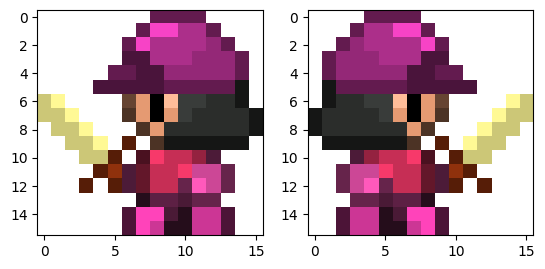

In [15]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(selected_sprites[1])
ax[1].imshow(mirrored_sprites[1]);